# PROYECTO 1: Predicción del precio de venta de un vehículo de 2 mano en función de sus características

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import pandas as pd
import os 

In [259]:
VERBOSE = 1
CURRENT_YEAR= 2021
VAR_OBJ = "price"

# Actual dir
path = "/Dataset"
if path not in os.getcwd():
    os.chdir(os.getcwd()+path) 
print("Path actual",os.getcwd())

Path actual /home/iciac/Escritorio/CursoIA/Grupo_5/Dataset


In [260]:
########## Funciones auxiliares
def mean_tax_mpg_at_nulls(df, model):
    df.model = df.model.str.strip()
    groupbymarca = df.groupby(by= "model", as_index=False).mean()

    mean = groupbymarca[groupbymarca.model == model]
    tax, mpg  = int(mean.tax.round()), mean.mpg.round(1)

    df.loc[(df["model"]==model) & (pd.isnull(df["mpg"])) & (pd.isnull(df["tax"])) ,[ "mpg", "tax"]] = mpg, tax

    if VERBOSE > 0:
        print("Models",groupbymarca["model"].to_list() )
        print("Nulls number ")
        print(df.isna().sum())
        
    return df


In [261]:
######### Programa en si

In [262]:
audi = pd.read_csv('audi.csv', header='infer')
audi["brand"]="Audi"
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi


In [263]:
bmw = pd.read_csv('bmw.csv', header='infer')
bmw["brand"]="BMW"
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,BMW
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,BMW
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,BMW
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,BMW
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,BMW
...,...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,BMW
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,BMW
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,BMW
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,BMW


In [264]:
df3 = pd.read_csv('cclass.csv', header='infer')
df7 = pd.read_csv('merc.csv', header='infer')

mercedes = pd.concat([df3,df7])
mercedes.sort_values("model", inplace = True)
mercedes.reset_index(drop=True, inplace=True)
mercedes["brand"]="Mercedes"
mercedes = mean_tax_mpg_at_nulls(mercedes, "C Class")
mercedes.isna().sum()

Models ['180', '200', '220', '230', 'A Class', 'B Class', 'C Class', 'CL Class', 'CLA Class', 'CLC Class', 'CLK', 'CLS Class', 'E Class', 'G Class', 'GL Class', 'GLA Class', 'GLB Class', 'GLC Class', 'GLE Class', 'GLS Class', 'M Class', 'R Class', 'S Class', 'SL CLASS', 'SLK', 'V Class', 'X-CLASS']
Nulls number 
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
tax             0
mpg             0
brand           0
dtype: int64


/home/iciac/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
tax             0
mpg             0
brand           0
dtype: int64

In [265]:
df4 = pd.read_csv('focus.csv', header='infer')
df5 = pd.read_csv('ford.csv', header='infer')

ford = pd.concat([df4,df5])
ford.sort_values("model", inplace = True)
ford.reset_index(drop=True, inplace=True)
ford["brand"]="Ford"

ford = mean_tax_mpg_at_nulls(ford, "Focus")
ford

Models ['B-MAX', 'C-MAX', 'EcoSport', 'Edge', 'Escort', 'Fiesta', 'Focus', 'Fusion', 'Galaxy', 'Grand C-MAX', 'Grand Tourneo Connect', 'KA', 'Ka+', 'Kuga', 'Mondeo', 'Mustang', 'Puma', 'Ranger', 'S-MAX', 'Streetka', 'Tourneo Connect', 'Tourneo Custom', 'Transit Tourneo']
Nulls number 
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
tax             0
mpg             0
brand           0
dtype: int64


,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg,brand
0,B-MAX,2017,9450,Automatic,17000,Petrol,1.6,150.0,44.1,Ford
1,B-MAX,2013,5998,Manual,37058,Petrol,1.0,30.0,55.4,Ford
2,B-MAX,2013,5995,Manual,43000,Petrol,1.0,30.0,55.4,Ford
3,B-MAX,2017,9998,Manual,8346,Petrol,1.4,150.0,47.1,Ford
4,B-MAX,2017,8990,Manual,15999,Diesel,1.5,0.0,74.4,Ford
...,...,...,...,...,...,...,...,...,...,...
23414,Tourneo Custom,2018,19995,Manual,2500,Diesel,2.0,145.0,32.5,Ford
23415,Tourneo Custom,2016,16700,Manual,22704,Diesel,2.0,200.0,44.8,Ford
23416,Tourneo Custom,2016,19498,Manual,30382,Diesel,2.0,235.0,44.1,Ford
23417,Tourneo Custom,2019,29890,Manual,6500,Diesel,2.0,145.0,31.7,Ford


In [266]:
hyundi = pd.read_csv('hyundi.csv', header='infer')
hyundi.rename(columns={"tax(£)":"tax"}, inplace=True)
hyundi["brand"]="Hyundi"
hyundi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundi
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundi
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundi
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundi
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundi
...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundi
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundi
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundi
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundi


In [267]:
skoda = pd.read_csv('skoda.csv', header='infer')
skoda["brand"]="Skoda"
skoda

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4,Skoda
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0,Skoda
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0,Skoda
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0,Skoda
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5,Skoda
...,...,...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2,Skoda
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4,Skoda
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0,Skoda
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0,Skoda


In [268]:
toyota = pd.read_csv('toyota.csv', header='infer')
toyota["brand"]="Toyota"
toyota

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,Toyota
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,Toyota
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,Toyota
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,Toyota
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,Toyota
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,Toyota
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,Toyota
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,Toyota
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,Toyota


In [269]:
vauxhall = pd.read_csv('vauxhall.csv', header='infer')
vauxhall["brand"]="Vauxhall"
vauxhall

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,Vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,Vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,Vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4,Vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4,Vauxhall
...,...,...,...,...,...,...,...,...,...,...
13627,Tigra,2007,2499,Manual,48640,Petrol,165,46.3,1.4,Vauxhall
13628,Vectra,2007,1795,Manual,75000,Petrol,240,39.2,1.8,Vauxhall
13629,Vectra,2005,1495,Manual,74000,Petrol,235,38.7,1.8,Vauxhall
13630,Vectra,2008,1695,Automatic,131000,Diesel,200,39.8,1.9,Vauxhall


In [270]:
vw = pd.read_csv('vw.csv', header='infer')
vw["brand"]="VW"
vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,VW
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,VW
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,VW
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,VW


In [271]:
############# Merge and save


dfs = [vw,vauxhall,toyota, skoda, hyundi, ford, mercedes, bmw, audi]

dataset = pd.DataFrame()

for df in dfs:
    dataset = dataset.append(df)

dataset.reset_index(drop=True, inplace=True)
dataset.to_csv("vehiculos.csv", index = False)

## Preprocess

In [272]:
df = pd.read_csv('vehiculos.csv', header='infer', index_col = False)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,T-Roc,2019,25000,Automatic,13904,Diesel,145.0,49.6,2.0,VW
1,T-Roc,2019,26883,Automatic,4562,Diesel,145.0,49.6,2.0,VW
2,T-Roc,2019,20000,Manual,7414,Diesel,145.0,50.4,2.0,VW
3,T-Roc,2019,33492,Automatic,4825,Petrol,145.0,32.5,2.0,VW
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,VW
...,...,...,...,...,...,...,...,...,...,...
108535,A3,2020,16999,Manual,4018,Petrol,145.0,49.6,1.0,Audi
108536,A3,2020,16999,Manual,1978,Petrol,150.0,49.6,1.0,Audi
108537,A3,2020,17199,Manual,609,Petrol,150.0,49.6,1.0,Audi
108538,Q3,2017,19499,Automatic,8646,Petrol,150.0,47.9,1.4,Audi


### Analisis

In [273]:
if "old" not in list(df.columns):
    df["old"] = 2021 - df["year"]
    df = df[df.columns.difference(['year'])]
    
df = df.drop(df[df.old < 0].index)
df.columns

Index(['brand', 'engineSize', 'fuelType', 'mileage', 'model', 'mpg', 'old',
       'price', 'tax', 'transmission'],
      dtype='object')

In [274]:
print("---------- Categoricas")
print("Transmission: ", df['transmission'].value_counts().index.to_list())
print("Fuel Type: ", df['fuelType'].value_counts().index.to_list())
marcas =  df['brand'].value_counts().index.to_list()
print("Brand: ", marcas)
print("Numero de marcas:", len(df["model"].unique()))
print()
print("---------- Variable objetivo: Precio")
print(dataset[VAR_OBJ].describe())

---------- Categoricas
Transmission:  ['Manual', 'Semi-Auto', 'Automatic', 'Other']
Fuel Type:  ['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric']
Brand:  ['Ford', 'Mercedes', 'VW', 'Vauxhall', 'BMW', 'Audi', 'Toyota', 'Skoda', 'Hyundi']
Numero de marcas: 195

---------- Variable objetivo: Precio
count    108540.000000
mean      16890.124046
std        9756.266820
min         450.000000
25%       10229.500000
50%       14698.000000
75%       20940.000000
max      159999.000000
Name: price, dtype: float64


<AxesSubplot:>

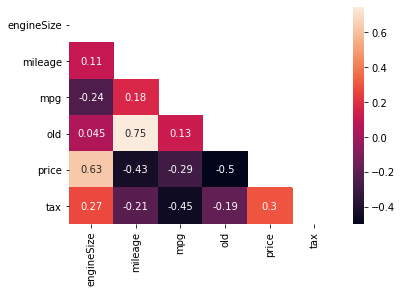

In [275]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)

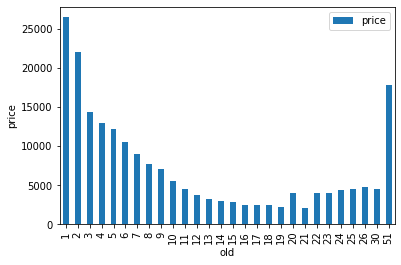

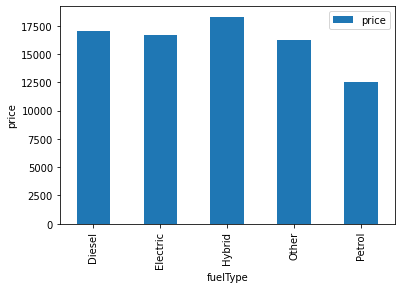

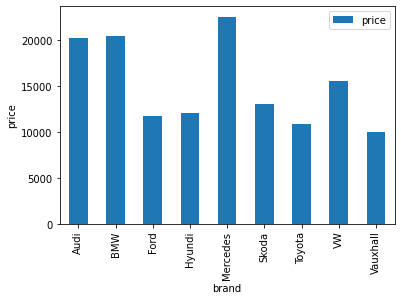

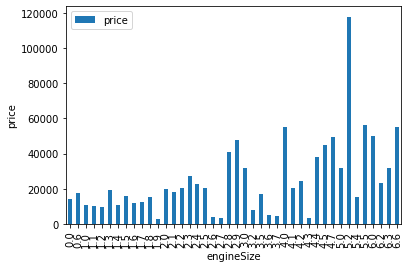

Year & EngineSize had more corr with price than others


In [276]:

def compare_bar(df, column_name, std = False):
    precio_vs = df.groupby(column_name, as_index = False).median()
    precio_vs.plot.bar(x=column_name,y=VAR_OBJ)
    plt.xlabel(column_name)
    plt.ylabel(VAR_OBJ)
    plt.show()
    
compare_bar(df, "old") 
compare_bar(df, "fuelType")
compare_bar(df, "brand") 
compare_bar(df, "engineSize") 


print("Year & EngineSize had more corr with price than others")


### Preprocess

In [277]:
df

,brand,engineSize,fuelType,mileage,model,mpg,old,price,tax,transmission
0,VW,2.0,Diesel,13904,T-Roc,49.6,2,25000,145.0,Automatic
1,VW,2.0,Diesel,4562,T-Roc,49.6,2,26883,145.0,Automatic
2,VW,2.0,Diesel,7414,T-Roc,50.4,2,20000,145.0,Manual
3,VW,2.0,Petrol,4825,T-Roc,32.5,2,33492,145.0,Automatic
4,VW,1.5,Petrol,6500,T-Roc,39.8,2,22900,150.0,Semi-Auto
...,...,...,...,...,...,...,...,...,...,...
108535,Audi,1.0,Petrol,4018,A3,49.6,1,16999,145.0,Manual
108536,Audi,1.0,Petrol,1978,A3,49.6,1,16999,150.0,Manual
108537,Audi,1.0,Petrol,609,A3,49.6,1,17199,150.0,Manual
108538,Audi,1.4,Petrol,8646,Q3,47.9,4,19499,150.0,Automatic


In [278]:
def oneHotEncoder(df, column_name, prefix):
    df = df.join(pd.get_dummies(df[column_name], prefix=prefix))
    df = df[df.columns.difference([column_name])]
    return df


In [279]:
df = oneHotEncoder(df,"fuelType", prefix='fuelType')
df = oneHotEncoder(df,"brand", prefix='Brand')
df = oneHotEncoder(df,"transmission", prefix='Transsmission')
df = oneHotEncoder(df,"model", prefix='Model')


In [280]:
# engineSize, mileage, tax, mpg, old - rescale
df.tax = scale(df.tax)
df.mileage = scale (df.mileage)
df.mpg = scale(df.mpg)
df.old = scale(df.old)
df.engineSize = scale(df.engineSize)

In [281]:
df

,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Hyundi,Brand_Mercedes,Brand_Skoda,Brand_Toyota,Brand_VW,Brand_Vauxhall,Model_ 1 Series,...,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,mileage,mpg,old,price,tax
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,-0.430749,-0.379965,-0.894780,25000,0.418038
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,-0.871905,-0.379965,-0.894780,26883,0.418038
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,-0.737225,-0.328244,-0.894780,20000,0.418038
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,-0.859485,-1.485514,-0.894780,33492,0.418038
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,-0.780387,-1.013555,-0.894780,22900,0.500815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108535,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.897594,-0.379965,-1.365131,16999,0.418038
108536,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.993929,-0.379965,-1.365131,16999,0.500815
108537,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1.058577,-0.379965,-1.365131,17199,0.500815
108538,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.679047,-0.489874,0.045922,19499,0.500815


In [292]:
Y = df[VAR_OBJ]
X = df[df.columns.difference([VAR_OBJ])]


[0.25729229 0.45923137 0.58961822 0.65905966 0.6980187  0.72942383
 0.75720499 0.78413257 0.80918155 0.82966453 0.8474177  0.86143277
 0.8734128  0.88334379 0.89230465 0.90083435 0.90761138 0.91276974
 0.9173627  0.92098833 0.92445878 0.92779369 0.9305343  0.93310473
 0.93566717]


Text(0, 0.5, 'Varianza explicada')

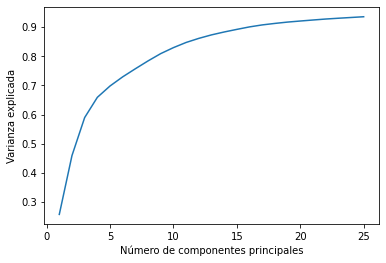

In [293]:
pca = PCA(n_components=25).fit(X)
plt.figure(figsize=(6,4))

xx = np.arange(1, 26, step=1)
yy = np.cumsum(pca.explained_variance_ratio_)
print(yy)

plt.plot(xx, yy)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')

In [295]:
print("PCA: Con 10 explicamos el 0.90 ")

components= []

for i in range(0,10):
    components.append("pca"+str(i+1))


df_final = pd.DataFrame(data = PCA(n_components=10).fit_transform(X), columns = components).set_index(X.index)
df_final.join(Y)
df_final.to_csv("dataset_entrenamiento.csv", index = False)

PCA: Con 10 explicamos el 0.90 
['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10']
